## I. Libraries & dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
df_full = pd.read_csv("Fraud_full.csv")
df_full.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
def randomRemove(data, n, features):
  df = data.copy() # Important to avoid modifying original dataset
  rows, _ = df.shape
  c_del = np.random.choice(features, size=n)
  r_del = np.random.randint(rows, size=n)
  print(r_del.shape)
  for index in range(n):
    df[c_del[index]][r_del[index]] = None
  return df

In [ ]:
missing_features = ["isFraud", "amount", "type"]
df_miss = randomRemove(df_full, 50000, missing_features)
df_miss.head(20)

(50000,)


<ipython-input-37-fd31fb4cb655>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c_del[index]][r_del[index]] = None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,NaN,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0
3,1,None,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,NaN,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,NaN,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0


In [ ]:
missingTotal = df_miss.isnull().sum().sort_values(ascending=False)
columns = pd.DataFrame(data={'Missing for train_data': missingTotal})
columns.head()

,Missing for train_data
amount,15476
isFraud,15279
type,15262
step,0
nameOrig,0


## II. Mandatory preprocess

## III. Data transformation

nameOrig & destOrig = INDICATOR + ACCOUNT CODE  
We can split this features into two

In [ ]:
# Transform the nameOrig and nameDest features by separating the indicator
# and the account code. 
# Do not consider the origIndicator since it is always the same (C)
# Transforms the nominal features into numeric features
def transformFeatures(data):
  df = data.copy() # Important to avoid modifying original dataset
  nominal = ['type', 'destIndicator']

  df['nameOrig'] = df['nameOrig'].map(lambda x : x[1:])
  df['destIndicator'] = df['nameDest'].map(lambda x : x[0])
  df['nameDest'] = df['nameDest'].map(lambda x : x[1:])
  for c in nominal:
    values = list(df[c].values)
    df[c] = LabelEncoder().fit_transform(values)
  return df

In [ ]:
df_miss = transformFeatures(df_miss)
df_miss.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,destIndicator
0,1,3,NaN,1231006815,170136.00,160296.36,1979787155,0.0,0.00,0.0,0,1
1,1,3,1864.28,1666544295,21249.00,19384.72,2044282225,0.0,0.00,0.0,0,1
2,1,4,181.00,1305486145,181.00,0.00,553264065,0.0,0.00,1.0,0,0
3,1,5,181.00,840083671,181.00,0.00,38997010,21182.0,0.00,NaN,0,0
4,1,3,11668.14,2048537720,41554.00,29885.86,1230701703,0.0,0.00,0.0,0,1
5,1,3,7817.71,90045638,53860.00,46042.29,573487274,0.0,0.00,NaN,0,1
6,1,3,7107.77,154988899,183195.00,176087.23,408069119,0.0,0.00,0.0,0,1
7,1,3,7861.64,1912850431,176087.23,168225.59,633326333,0.0,0.00,0.0,0,1
8,1,3,4024.36,1265012928,2671.00,0.00,1176932104,0.0,0.00,0.0,0,1
9,1,2,5337.77,712410124,41720.00,36382.23,195600860,41898.0,40348.79,0.0,0,0


In [ ]:
print('Dest', df_miss['destIndicator'].unique())

Dest [1 0]


## IV. Dealing with missing data

nameOrig and nameDest result in infinity means  
isFlaggedFraud results in zero mean

### 1. Discard missing data

In [ ]:
df_without_missing = df_miss.dropna()
df_without_missing = df_without_missing.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

In [ ]:
means = {f : np.mean(df_without_missing[f]) for f in df_without_missing.columns}
print(means)
def chi(x):
  return np.sum([(x[ind] - means[ind]) / means[ind] for ind in range(df_without_missing.shape[1])])

#df_without_missing['isOutlier'] = df_without_missing.apply(chi, axis=1)

{'step': 8.497843895223077, 'type': 2.337161756702067, 'amount': 172652.73542277797, 'oldbalanceOrg': 871256.5374136511, 'newbalanceOrig': 887451.2304532704, 'oldbalanceDest': 881795.9802530108, 'newbalanceDest': 1182108.1358443697, 'isFraud': 0.00122807262374925, 'destIndicator': 0.39589991208116443}


In [ ]:
df_without_missing[df_without_missing['isFraud'] == 1.0].head(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,destIndicator
2,1,4,181.00,181.00,0.0,0.00,0.00,1.0,0
3,1,1,181.00,181.00,0.0,21182.00,0.00,1.0,0
251,1,4,2806.00,2806.00,0.0,0.00,0.00,1.0,0
252,1,1,2806.00,2806.00,0.0,26202.00,0.00,1.0,0
680,1,4,20128.00,20128.00,0.0,0.00,0.00,1.0,0
681,1,1,20128.00,20128.00,0.0,6268.00,12145.85,1.0,0
724,1,1,416001.33,0.00,0.0,102.00,9291619.62,1.0,0
969,1,4,1277212.77,1277212.77,0.0,0.00,0.00,1.0,0
970,1,1,1277212.77,1277212.77,0.0,0.00,2444985.19,1.0,0
1115,1,4,35063.63,35063.63,0.0,0.00,0.00,1.0,0


Outliers are considered as frauds

### 2. Replace missing datas by averrages

In [ ]:
def naToAverr(data, features, means):
  df = data.copy()
  for col in features:
    df[col] = df[col].fillna(means[col])
  return df

In [ ]:
filled_df = naToAverr(df_miss, missing_features, means)

In [ ]:
filled_df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,destIndicator
0,1,3,172652.735423,1231006815,170136.00,160296.36,1979787155,0.0,0.00,0.000000,0,1
1,1,3,1864.280000,1666544295,21249.00,19384.72,2044282225,0.0,0.00,0.000000,0,1
2,1,4,181.000000,1305486145,181.00,0.00,553264065,0.0,0.00,1.000000,0,0
3,1,5,181.000000,840083671,181.00,0.00,38997010,21182.0,0.00,0.001228,0,0
4,1,3,11668.140000,2048537720,41554.00,29885.86,1230701703,0.0,0.00,0.000000,0,1
5,1,3,7817.710000,90045638,53860.00,46042.29,573487274,0.0,0.00,0.001228,0,1
6,1,3,7107.770000,154988899,183195.00,176087.23,408069119,0.0,0.00,0.000000,0,1
7,1,3,7861.640000,1912850431,176087.23,168225.59,633326333,0.0,0.00,0.000000,0,1
8,1,3,4024.360000,1265012928,2671.00,0.00,1176932104,0.0,0.00,0.000000,0,1
9,1,2,5337.770000,712410124,41720.00,36382.23,195600860,41898.0,40348.79,0.000000,0,0


## V. Decreasing data dimensions

In [ ]:
df_full_transformed = transformFeatures(df_full)
fraud = df_full_transformed['isFraud']
df_full_transformed = df_full_transformed.drop(columns=['isFraud', 'isFlaggedFraud'])
df_full_transformed.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,destIndicator
0,1,3,9839.64,1231006815,170136.00,160296.36,1979787155,0.0,0.00,1
1,1,3,1864.28,1666544295,21249.00,19384.72,2044282225,0.0,0.00,1
2,1,4,181.00,1305486145,181.00,0.00,553264065,0.0,0.00,0
3,1,1,181.00,840083671,181.00,0.00,38997010,21182.0,0.00,0
4,1,3,11668.14,2048537720,41554.00,29885.86,1230701703,0.0,0.00,1
5,1,3,7817.71,90045638,53860.00,46042.29,573487274,0.0,0.00,1
6,1,3,7107.77,154988899,183195.00,176087.23,408069119,0.0,0.00,1
7,1,3,7861.64,1912850431,176087.23,168225.59,633326333,0.0,0.00,1
8,1,3,4024.36,1265012928,2671.00,0.00,1176932104,0.0,0.00,1
9,1,2,5337.77,712410124,41720.00,36382.23,195600860,41898.0,40348.79,0


In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(df_full_transformed)

In [ ]:
print(pca.explained_variance_ratio_)

[0.5018834  0.49807975]


We can limit ourselves to 2 components since it represents 99% of the variance.

In [ ]:
def plotACP(df):
  groups = df.groupby('Fraud')
  print(groups.groups.keys())
  plt.figure()
  for name, grp in groups:
    plt.scatter(grp.X1, grp.X2, marker='o', label=name)
  plt.legend()

dict_keys([0, 1])


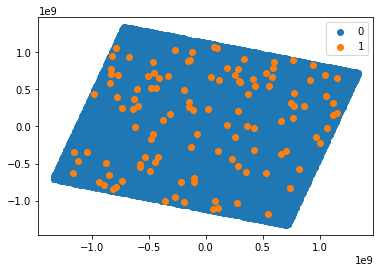

In [ ]:
final = pd.DataFrame(data={'X1' : X[:,0], 'X2' : X[:,1], 'Fraud' : fraud})
plotACP(final)

In [ ]:
fraud_avr = filled_df['isFraud'].apply(int)
filled_df = filled_df.drop(columns=['isFraud', 'isFlaggedFraud'])

In [ ]:
pca_avr = PCA(n_components=2)
X_avr = pca_avr.fit_transform(filled_df)

In [ ]:
print(pca_avr.explained_variance_ratio_)

[0.50188341 0.49807977]


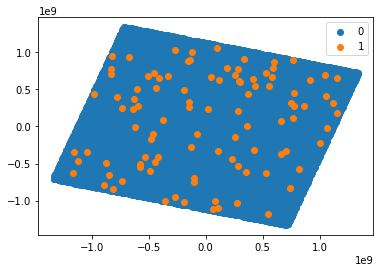

In [ ]:
final_avr = pd.DataFrame(data={'X1' : X_avr[:,0], 'X2' : X_avr[:,1], 'Fraud' : fraud_avr})
plotACP(final_avr)

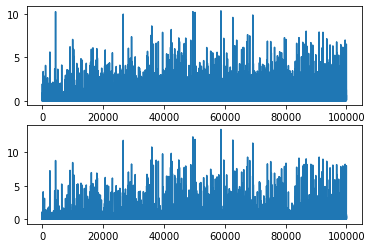

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(np.abs(X[:,0]-X_avr[:,0]))
ax2.plot(np.abs(X[:,1]-X_avr[:,1]))